# Linear classifiers demo: `predict`

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2017 Winter Term 2

Mike Gelbart

In [5]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 16

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from plot_classifier import plot_classifier

%autosave 0

Autosave disabled


### Linear decision boundaries and the coefficients

- Key idea: compute $w^Tx$ (or $w^Tx+\beta$) just like in linear regression, but then look at the **sign** of this function to make a prediction. 

$$\hat{y}_i = \textrm{sign}(w^Tx_i)$$

with the convention that $y_i \in \{-1,+1\}$.

We're actually fitting a hyperplane through the space, that divides it in half. The $w$ represents the tilt of the hyperplane and $\beta$ represents the intercept (offset from the origin).

In [6]:
N = 20
X = np.random.randn(N,2)
y = np.random.choice((-1,+1),size=N)
X[y>0,0] -= 1
X[y>0,1] += 1

In [7]:
model = LogisticRegression() # can change to LinearSVC and get the same plot
model.fit(X,y);

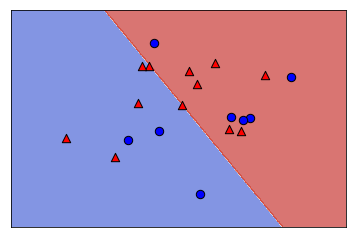

In [14]:
# Let's play with the coefficients and see what they do.
model.coef_ = np.array([[4,2]])  # this is w
model.intercept_ = np.array([2]) # this is β

# Plot the data and decision boundary
plot_classifier(X,y,model);

Demo: change the coefficients and see what happens.

Question: why do we need 2 coefficients to encode a slope? Indeed, what if we double the coefficients? (Answer coming soon!)

#### Actual learned boundaries

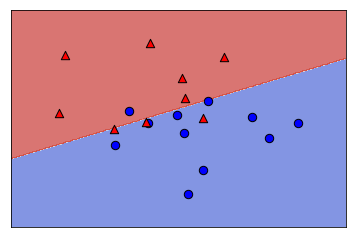

In [5]:
lr = LogisticRegression(C=1e6) # very little regularization
lr.fit(X,y)
plot_classifier(X,y,lr);

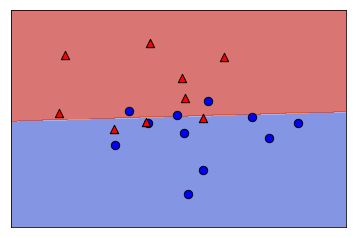

In [6]:
# support vector machine
svm = LinearSVC(C=1e6) # very little regularization
svm.fit(X,y)
plot_classifier(X,y,svm);

They look the same! Let's try a non-separable data set.

### Probabilities and `predict_proba`

In [7]:
lr.predict(X)

array([-1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
       -1,  1, -1])

In [8]:
lr.predict_proba(X)

array([[  7.90780620e-01,   2.09219380e-01],
       [  5.93961907e-01,   4.06038093e-01],
       [  8.58005735e-02,   9.14199426e-01],
       [  9.88724267e-01,   1.12757332e-02],
       [  8.88429036e-01,   1.11570964e-01],
       [  5.14545510e-01,   4.85454490e-01],
       [  8.04779463e-01,   1.95220537e-01],
       [  9.39853268e-04,   9.99060147e-01],
       [  6.09430800e-01,   3.90569200e-01],
       [  9.95937783e-01,   4.06221664e-03],
       [  2.72621617e-03,   9.97273784e-01],
       [  9.22742136e-01,   7.72578638e-02],
       [  2.71877820e-01,   7.28122180e-01],
       [  7.60849787e-02,   9.23915021e-01],
       [  9.99124949e-01,   8.75051367e-04],
       [  5.78267996e-01,   4.21732004e-01],
       [  4.55644863e-02,   9.54435514e-01],
       [  9.82159292e-01,   1.78407078e-02],
       [  3.25971354e-01,   6.74028646e-01],
       [  5.22148741e-01,   4.77851259e-01]])

Logistic regression can output probabilities of each class. Note that the probabilities add up to 1 for each row. We can plot these probabilities (say the second column).

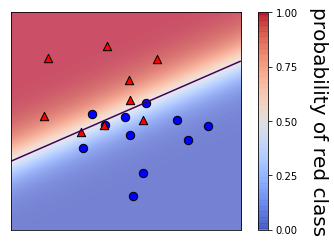

In [9]:
lr = LogisticRegression(C=1e6) # very little regularization
lr.fit(X,y)
plot_classifier(X,y,lr, proba=True);

Going back to the issue of the scale of the coefficents, let's try changing them now.

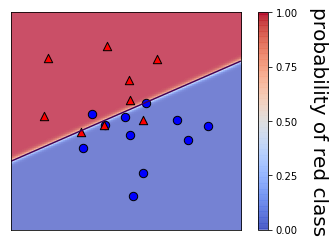

In [10]:
lr.fit(X,y)
lr.coef_      *= 10
lr.intercept_ *= 10

plot_classifier(X,y,lr, proba=True);

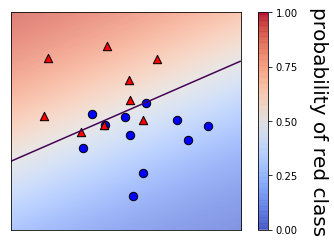

In [11]:
lr.fit(X,y)
lr.coef_      /= 5
lr.intercept_ /= 5

plot_classifier(X,y,lr, proba=True);

Thus, we have an interpretation for regularization here: smaller coefficients means less confident predictions. 

This makes sense -- there's a relationship between overconfidence and overfitting.

### Where do these probabilities come from?

- The probabilities come from a softer version of taking $\textrm{sign}(w^Tx)$. 
- Instead we take $h(w^Tx)$ where $$h(z)\equiv \frac{1}{1+\exp(-z)}$$ 
- This is "squishing" the output from any number to $[0,1]$.

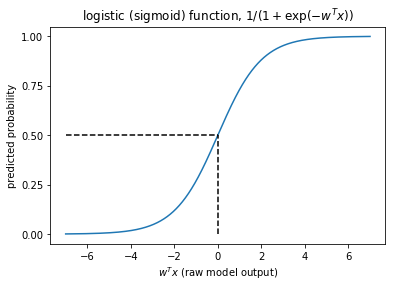

In [12]:
z = np.linspace(-7,7,1000)
plt.plot(z, 1/(1+np.exp(-z)));
plt.plot((0,0),(0,0.5),'--',color='black');
plt.plot((-7,0),(0.5,0.5),'--',color='black');
plt.yticks((0,0.25,0.5,0.75,1));
plt.xlabel("$w^Tx$ (raw model output)");
plt.ylabel("predicted probability");
plt.title("logistic (sigmoid) function, $1/(1+\exp(-w^Tx))$");

- Thus, checking whether the raw model output is positive or negative corresponds to checking whether the probability is greater or less than 0.5. Makes sense!
- Furthermore, making the coefficients larger (e.g. doubling) pushes $w^Tx$ away from zero and towards the edges of the sigmoid. Hence the behaviour we observed.
- We can sort of see the sigmoid in the probability contours above: for small coefficients it appears linear; for large coefficients we see the saturation.

### Interpretation of the coefficients

- Above we've seen a geometric interpretation
- The interpretation from linear regression also holds:
  - the $j$th coefficient tells us how feature $j$ affects the prediction
  - if $w_j>0$ then increasing $x_{ij}$ moves us toward predicting $+1$
  - if $w_j<0$ then increasing $x_{ij}$ moves us toward prediction $-1$
  - if $w_j=0$ then the feature is not used in making a prediction

### Preview of next lecture

- We need a loss function for our linear classifiers.
- Number of errors is not smooth/convex.
- But, maybe, higher probabilities on the correct class?